In [3]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\jaysu\anaconda3\lib\site-packages (0.0)


In [4]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [5]:
import pandas as pd
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [8]:
df = pd.read_csv("../data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Select your features (columns)

In [9]:
# Set features. This will also be used as your x values.
# these features seem interesting according to the documentation ['koi_period', 'koi_impact', 'koi_duration', koi_prad', 'koi_teq', 'koi_slogg', 'koi_srad', ]
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_depth', 'koi_model_snr']]
selected_features

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_depth,koi_model_snr
0,0,0,0,0,874.8,25.8
1,0,1,0,0,10829.0,76.3
2,0,1,0,0,8079.2,505.6
3,0,0,0,0,603.3,40.9
4,0,0,0,0,686.0,40.2
...,...,...,...,...,...,...
6986,0,0,0,1,87.7,8.4
6987,0,1,1,0,1579.2,453.3
6988,0,0,0,0,48.5,10.6
6989,0,0,1,0,103.6,12.3


# Create a Train Test Split

Use `koi_disposition` for the y values

In [10]:
# pull out the output labels column or y values
labels = df['koi_disposition']

In [11]:
# Split the data in training and test groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, train_size=.8, random_state=3 )

In [12]:
# inspect the new dataframe to see it's shape
X_train

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_depth,koi_model_snr
2471,0,0,0,0,650.6,31.9
1965,0,0,0,0,202.0,71.6
6013,1,0,0,0,80.0,12.0
9,0,0,0,0,9145.7,1741.5
2665,0,0,0,0,1384.3,45.5
...,...,...,...,...,...,...
968,1,0,0,0,1743.4,78.6
1667,0,0,0,0,575.0,17.5
3321,0,0,0,0,126.0,14.1
1688,0,0,0,0,351.5,23.0


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

[0.         0.         0.         0.         0.00069776 0.0035332 ]


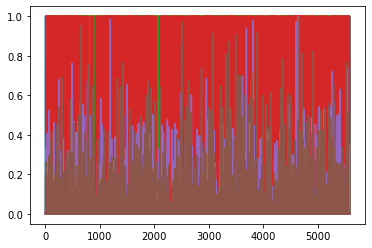

In [13]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

# inspect the scaled data to see how the feature values have been scaled
print(X_train_scaled[0])

# Plot the scaled data
import matplotlib.pyplot as plt 
plt.plot(X_train_scaled)

# Train the Model



In [16]:
# Random Forest Classifier model for training
# Hypertuning results: {'bootstrap': True, 'max_depth': 40, 'min_samples_split': 8, 'n_estimators': 200}
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, bootstrap= True, max_depth= 40, min_samples_split= 8)
clf = clf.fit(X_train_scaled, y_train)

print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

Training Data Score: 0.952074391988555
Testing Data Score: 0.8634739099356683


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [23]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid={'bootstrap': [True], 'n_estimators' : [10, 50, 100, 200],
'min_samples_split' : range(8, 10, 20),'max_depth': [3, 10, 20, 40]}
grid = GridSearchCV(clf, param_grid, verbose=3)

# To get list of parameters you can tune
clf.get_params().keys()
# grid.fit(X_train_scaled, y_train)

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [24]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10, score=0.650, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10, score=0.626, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10, score=0.628, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10, score=0.646, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10, score=0.641, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=50 
[Parall

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [3, 10, 20, 40],
                         'min_samples_split': range(8, 10, 20),
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)

In [25]:
print(grid.best_params_)
print(grid.best_score_)

{'bootstrap': True, 'max_depth': 40, 'min_samples_split': 8, 'n_estimators': 200}
0.7144129453687407


# Save the Model

In [30]:
import joblib
filename = 'model_2_randomforest_clf.h5'
joblib.dump(clf, filename)

['model_2_randomforest_clf.h5']